<a href="https://colab.research.google.com/github/TanmayKhedekar/Customer_chrun_model/blob/main/chrun18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


In [23]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
print("Shape:", df.shape)
df.info()


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

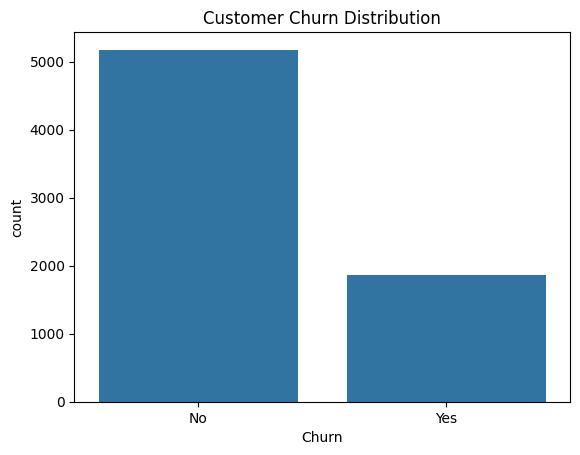

In [25]:
#EDA
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()


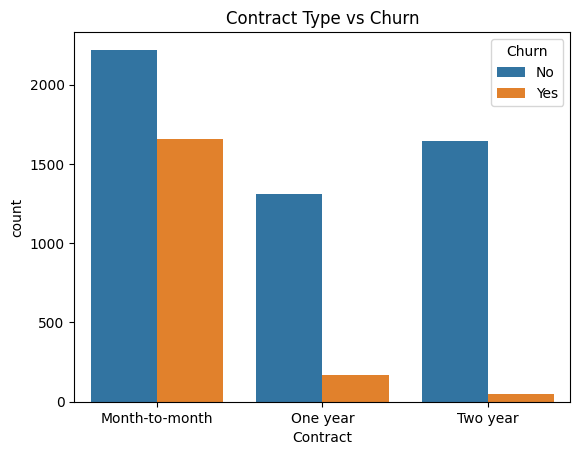

In [26]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.show()


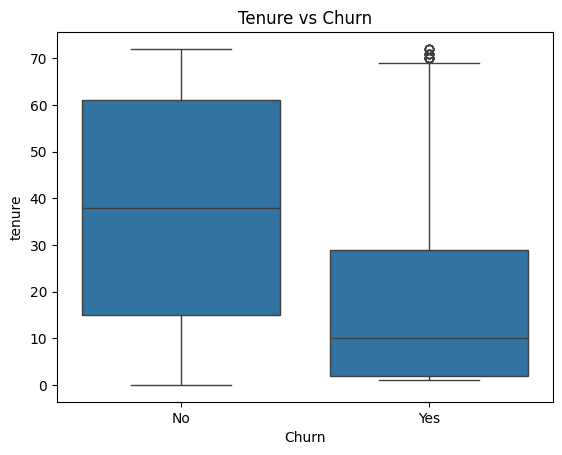

In [27]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


In [28]:
# Fix TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Drop customerID
df.drop("customerID", axis=1, inplace=True)

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [29]:
df = pd.get_dummies(df, drop_first=True)


In [30]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
#MODEL TRAINING
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
#LOGISTICREGRESSION
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression AUC:", roc_auc_score(y_test, y_prob_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8038379530916845
Logistic Regression AUC: 0.8356883279581303
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [33]:
#RANDOMFOREST FINAL
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7931769722814499
Random Forest AUC: 0.8291047828090138
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



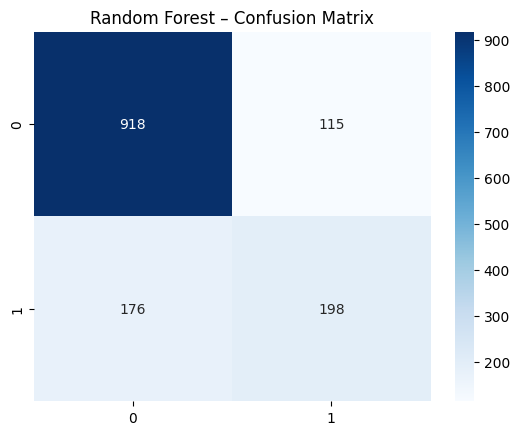

In [34]:
#CONFUSION MATRIX
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Random Forest – Confusion Matrix")
plt.show()


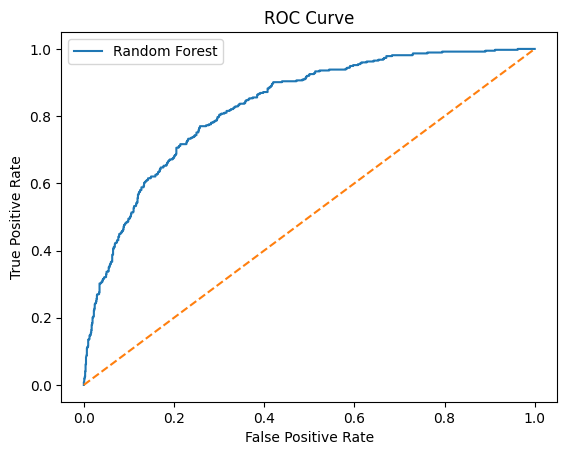

In [35]:
#ROC CURVE
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [36]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
1,tenure,0.179185
3,TotalCharges,0.175053
2,MonthlyCharges,0.141708
10,InternetService_Fiber optic,0.054147
25,Contract_Two year,0.047261
28,PaymentMethod_Electronic check,0.047049
13,OnlineSecurity_Yes,0.032325
24,Contract_One year,0.028622
26,PaperlessBilling_Yes,0.024136
19,TechSupport_Yes,0.023725


In [37]:
print("""
Top Churn Drivers:
1. Month-to-Month Contract
2. Low Tenure
3. High Monthly Charges
4. Fiber Optic Internet
5. No Online Security

Business Recommendations:
- Convert month-to-month customers to long-term plans
- Retention offers for new customers (< 6 months)
- Discounts for high monthly charge users
- Improve online security & support services
""")



Top Churn Drivers:
1. Month-to-Month Contract
2. Low Tenure
3. High Monthly Charges
4. Fiber Optic Internet
5. No Online Security

Business Recommendations:
- Convert month-to-month customers to long-term plans
- Retention offers for new customers (< 6 months)
- Discounts for high monthly charge users
- Improve online security & support services

